# Tổng quan:
Robert là một thanh niên người Mỹ năm nay 25 tuổi, anh vừa kết thúc nghĩa vụ quân sự. Robert giờ muốn theo học ngành Hệ thống quản lý và Công nghệ thông tin (Management Systems and Information Technology).
Hãy dùng kĩ năng data của bạn để giúp tìm ngôi trường tốt nhất cho Robert. Robert sẵn sàng chuyển tới bất kỳ đâu trên nước Mỹ để sinh sống, tuy nhiên anh ý có một vài tiêu chí chọn trường như sau: 1) an toàn (tỷ lệ tội phạm thấp), 2) ở đô thị -- vì Robert thích cuộc sống ở thành phố, và 3) start-ups – ngôi trường phải ở trong một khu vực mà xếp hạng cao về tinh thần doanh nhân (entrepreneurialism), vì anh ý có kế hoạch sẽ tìm kiếm 1 công việc thực tập tại 1 startup trong khi theo học.
Hãy giúp Robert rút gọn danh sách tìm kiếm xuống thành một danh sách những trường tiềm năng để anh ý có thể tiếp tục nghiên cứu kĩ hơn trước khi đưa ra lựa chọn.
Các tiêu chí chọn trường:
+ Khu vực thành thị (urban/metropolitan area)
+ Xếp hạng trong khoảng 25% trên tổng thành phố
+ Ở thành phố có tội phạm thấp, xếp hảng trong khoảng 50% tổng thành phố
+ Có chương trình học về CNTT


## 1. Import thư viện và dữ liệu

In [667]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')

In [668]:
crime_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\1.Data Wrangling\data\Crime.csv')
dic_uni_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\1.Data Wrangling\data\Dictionary for University_info.csv')
startup_rank_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\1.Data Wrangling\data\metro_startup_ranking.csv')
uni_inf_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\1.Data Wrangling\data\University_info.csv')

C:\Users\VINH\AppData\Local\Temp\ipykernel_1896\2755184215.py:4: DtypeWarning: Columns (7,9,1427,1542,1561,1575,1725,1726,1727,1728) have mixed types. Specify dtype option on import or set low_memory=False.
  uni_inf_df = pd.read_csv(r'D:\DATA ANALYST COURSES\MINX COURSES\Course 2 BI\Final exam\1.Data Wrangling\data\University_info.csv')


## 2. Tìm hiểu và xử lý dữ liệu

### Crime data

In [669]:
crime_df.head()

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
0,"Abilene, TX M.S.A.",412.5,5.3,56.0,78.4,272.8,"3,609.0",852.0,"2,493.6",263.4,TX,Abilene
1,"Akron, OH M.S.A.",238.4,5.1,38.2,75.2,119.8,"2,552.4",575.3,"1,853.0",124.1,OH,Akron
2,"Albany, GA M.S.A.",667.9,7.8,30.4,157.9,471.8,"3,894.1","1,099.6","2,652.8",141.7,GA,Albany
3,"Albany, OR M.S.A.",114.3,2.5,28.2,20.7,63.0,"3,208.4",484.6,"2,476.1",247.7,OR,Albany
4,"Albuquerque, NM M.S.A.",792.6,6.1,63.8,206.7,516.0,"4,607.8",883.4,"3,047.6",676.9,NM,Albuquerque


In [670]:
# Kiểm tra số lượng bản ghi và kiểu dữ liệu, giá trị null
crime_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MSA                378 non-null    object 
 1   ViolentCrime       377 non-null    object 
 2   Murder             378 non-null    float64
 3   Rape               378 non-null    float64
 4   Robbery            378 non-null    float64
 5   AggravatedAssault  377 non-null    float64
 6   PropertyCrime      372 non-null    object 
 7   Burglary           374 non-null    object 
 8   Theft              375 non-null    object 
 9   MotorVehicleTheft  378 non-null    float64
 10  State              378 non-null    object 
 11  City               373 non-null    object 
dtypes: float64(5), object(7)
memory usage: 35.6+ KB


Định nghĩa cột: 
+ MSA là viết tắt của Main Street Address: là sự kết hợp của thành phố và từ viết tắt Bang
+ ViolentCrime: Tội phạm bạo lực
+ Munder: Tội phạm nghiện ngập
+ Rape: Tội phạm tình dục
+ Robbery: Tội phạm ăn cướp
+ AggravatedAssault: Số lượng vụ tấn công nghiêm trọng
+ PropertyCrime: Tội phạm tài sản
+ Burglary: Ăn trộm
+ Theft: Trộm cắp
+ MotorVehicleTheft: Tội phạm trộm phương tiện giao 

==> Kiểu dữ liệu sai

In [671]:
crime_df.isnull().sum()

MSA                  0
ViolentCrime         1
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    1
PropertyCrime        6
Burglary             4
Theft                3
MotorVehicleTheft    0
State                0
City                 5
dtype: int64

In [672]:
crime_df.dropna(inplace=True)

In [673]:
# # Đổi kiểu dữ liệu thành sạng số
# crime_df.ViolentCrime = pd.to_numeric(crime_df.ViolentCrime)
# crime_df.PropertyCrime = pd.to_numeric(crime_df.PropertyCrime)
# crime_df.Burglary = pd.to_numeric(crime_df.Burglary)
# crime_df.Theft = pd.to_numeric(crime_df.Theft)

==> Dử liệu tồn tại ký hiệu "," trong chuỗi nên không thể chuyển thành số được

In [674]:
crime_df.ViolentCrime.replace(',','',inplace=True)

In [675]:
crime_df.loc[crime_df.ViolentCrime.str.contains(',')]

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
9,"Anchorage, AK M.S.A.","1,039.5",8.2,165.6,199.1,666.6,"4,030.1",554.9,"3,087.5",387.7,AK,Anchorage
211,"Memphis, TN-MS-AR M.S.A.","1,038.0",11.5,52.3,259.9,714.2,"3,959.3","1,047.3","2,644.7",267.4,TN,Memphis
225,"Monroe, LA M.S.A.2","1,160.0",15.1,41.3,122.2,981.3,"4,701.9","1,179.5","3,356.0",166.3,LA,Monroe
243,"Odessa, TX M.S.A.","1,070.1",7.6,55.4,126.6,880.5,"4,233.9",801.2,"2,937.7",495.1,TX,Odessa


==> Như vậy có thể hiểu các hàng có kiểu dữ liệu object có chứa ký tự "," ở trong bản cột dữ liệu đó

In [676]:
# Tạo hàm translate, trogn đó dùng lệnh translate để loại bỏ dấu "," mà không dùng replace
def translate(x):
   return x.translate({ord(',') : None})

In [677]:
# Sử dụng lệnh apply để thực thi từng ô dữ liệu
crime_df.PropertyCrime = crime_df.PropertyCrime.apply(translate)
crime_df.ViolentCrime = crime_df.ViolentCrime.apply(translate)
crime_df.Burglary = crime_df.Burglary.apply(translate)
crime_df.Theft = crime_df.Theft.apply(translate)

In [678]:
# Kiểm tra lại xem dữ liệu còn chứa dấu ',' không
crime_df.loc[crime_df.ViolentCrime.str.contains(',')]

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City


==> Dữ liệu đã sạch, tiến hành biến đổi kiểu dữ liệu

In [679]:
# Đổi kiểu dữ liệu thành sạng số
crime_df.ViolentCrime = pd.to_numeric(crime_df.ViolentCrime)
crime_df.PropertyCrime = pd.to_numeric(crime_df.PropertyCrime)
crime_df.Burglary = pd.to_numeric(crime_df.Burglary)
crime_df.Theft = pd.to_numeric(crime_df.Theft)

==> Thành công

In [680]:
# Thống kê cơ bản các cột có kiểu dữ liệu số
crime_df.describe()

,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,365.400546,4.634973,41.105738,78.167760,241.493716,2632.277049,540.893443,1900.547814,190.835246
std,181.617205,3.404547,19.449643,53.702617,137.650865,821.481927,229.130619,572.077309,133.309482
min,61.600000,0.000000,2.700000,2.300000,25.500000,420.000000,168.900000,226.500000,15.700000
25%,236.750000,2.225000,29.000000,37.025000,144.300000,2027.950000,367.250000,1496.175000,98.500000
50%,332.750000,3.900000,37.400000,67.900000,215.600000,2591.550000,506.850000,1857.050000,157.350000
75%,447.625000,6.400000,50.625000,106.975000,305.800000,3224.375000,678.250000,2265.075000,247.300000
max,1160.000000,20.600000,165.600000,351.900000,981.300000,5190.600000,1503.700000,3936.400000,718.600000


In [681]:
 # Kiểm tra dữ liệu null trước khi thống kê số liệu
crime_df.isnull().sum()

MSA                  0
ViolentCrime         0
Murder               0
Rape                 0
Robbery              0
AggravatedAssault    0
PropertyCrime        0
Burglary             0
Theft                0
MotorVehicleTheft    0
State                0
City                 0
dtype: int64

In [682]:
# Kiểm tra lượng unique data
crime_df['MSA'].nunique()

366

In [683]:
# Kiểm tra lượng unique data
crime_df['City'].nunique()

334

In [684]:
# Kiểm tra lượng unique data
crime_df['State'].nunique()

58

==> Tập dữ liệu có 366 địa chỉ, 334 thành phố và 58 bang 

In [685]:
crime_df.sample(5)

,MSA,ViolentCrime,Murder,Rape,Robbery,AggravatedAssault,PropertyCrime,Burglary,Theft,MotorVehicleTheft,State,City
165,"Kahului-Wailuku-Lahaina, HI M.S.A.",337.7,2.4,57.0,68.5,209.8,3641.0,610.6,2677.6,352.9,HI,Kahului
34,"Bloomington, IN M.S.A.",277.7,1.8,44.8,47.2,183.9,2557.1,492.5,1907.3,157.3,IN,Bloomington
41,"Brownsville-Harlingen, TX M.S.A.",299.8,1.6,44.3,61.5,192.4,3229.7,567.9,2589.0,72.8,TX,Brownsville
127,"Goldsboro, NC M.S.A.",494.3,8.8,3.2,106.6,375.7,3604.3,1099.2,2337.7,167.4,NC,Goldsboro
20,"Bangor, ME M.S.A.",67.3,2.0,9.1,17.6,38.5,1984.5,337.0,1604.4,43.1,ME,Bangor


In [686]:
crime_df.MSA.duplicated().sum()

0

==> Cột MSA không trùng nhau có nghĩa, mỗi con đường sẽ được thống kê trong tập dữ liệu này

In [687]:
crime_df.City.duplicated().sum() 

32

==> Trong tập dữ liệu này có sự trùng thành phố --> dữ liệu thống kê theo hướng nhiều con đường trong 1 thành phố <p>
*** ==> Tiến hành pivot dữ liệu thành tổng số vụ tội phạm theo thành phố**

In [688]:
# Xóa cột đầu tiên, không có giá trị
crime_df.drop(columns=['MSA'],inplace=True)

In [689]:
crime_sum_df = pd.pivot_table(data=crime_df,index=['City'],
                                values=crime_df.columns,
                                aggfunc=np.sum,margins=True, margins_name='Total',fill_value=0).reset_index()
crime_sum_df['Total'] = crime_sum_df['AggravatedAssault'] + crime_sum_df['Burglary'] + crime_sum_df['MotorVehicleTheft'] + crime_sum_df['Murder'] + crime_sum_df['PropertyCrime'] + crime_sum_df['Rape'] + crime_sum_df['Robbery'] + crime_sum_df['Theft'] + crime_sum_df['ViolentCrime'] 

In [690]:
crime_sum_df.head()

,City,AggravatedAssault,Burglary,MotorVehicleTheft,Murder,PropertyCrime,Rape,Robbery,Theft,ViolentCrime,Total
0,Abilene,272.8,852.0,263.4,5.3,3609.0,56.0,78.4,2493.6,412.5,8043.0
1,Aguadilla,59.9,284.5,22.5,4.8,710.2,3.5,40.5,403.3,108.7,1637.9
2,Akron,119.8,575.3,124.1,5.1,2552.4,38.2,75.2,1853.0,238.4,5581.5
3,Albany,534.8,1584.2,389.4,10.3,7102.5,58.6,178.6,5128.9,782.2,15769.5
4,Albuquerque,516.0,883.4,676.9,6.1,4607.8,63.8,206.7,3047.6,792.6,10800.9


In [691]:
crime_sum_df = crime_sum_df[['City','Total']]

--> Những thông số này có thể không thể hiện số lượng vụ (vì là số thập phân) nhưng nhìn chung thì các chỉ số này càng thấp thì thành phố đó càng an toan và càng phù hợp với Robert hơn!

### Dictionary for university

In [692]:
dic_uni_df.head(10)

,NAME OF DATA ELEMENT,Year,dev-category,developer-friendly name,VARIABLE NAME,API data type,label,VALUE,LABEL,SCORECARD? Y/N,SOURCE,NOTES
0,Unit ID for institution,NaN,root,id,UNITID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
1,8-digit OPE ID for institution,NaN,root,ope8_id,OPEID,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
2,6-digit OPE ID for institution,NaN,root,ope6_id,opeid6,integer,NaN,NaN,NaN,NaN,IPEDS,NaN
3,Institution name,2013,school,name,INSTNM,string,NaN,NaN,NaN,Y,IPEDS,NaN
4,City,2013,school,city,CITY,string,NaN,NaN,NaN,Y,IPEDS,NaN
5,State postcode,2013,school,state,STABBR,string,NaN,NaN,NaN,Y,IPEDS,NaN
6,ZIP code,2013,school,zip,ZIP,integer,NaN,NaN,NaN,Y,IPEDS,NaN
7,Accreditor for institution,NaN,school,accreditor,AccredAgency,string,NaN,NaN,NaN,NaN,IPEDS,NaN
8,URL for institution's homepage,2013,school,school_url,INSTURL,string,NaN,NaN,NaN,Y,IPEDS,NaN
9,URL for institution's net price calculator,2013,school,price_calculator_url,NPCURL,string,NaN,NaN,NaN,Y,IPEDS,NaN


Vì dữ liệu có cấu trúc cột hàng không theo dạng bảng từ trên xuống nên rất khó để nhìn ra, nên ta tìm hiểu dữ liệu thông qua excel: Các thông trong file này là để giải thích các cột trong tập dữ liệu University info
+ main_campus (main): Thể hiện có thuộc dh chính quy hay không (0,1)
+ branches (NUMBRANCH): Số lượng chi nhánh (số lượng không giới hạn)
+ PREDDEG: Loại bằng cấp (0-->4)
+ HIGHDEG: Bằng cấp cao nhất (0-->4) 
+ CONTROL: Trường có thuộc về tổ chức nào(1-->3)
+ st_fips: Thuộc Bang nào 
+ region: Thuộc khu vực nào (khu vực lớn hơn bang, 1 khuc vực chứa nhiều bang)


### Metro startup ranking

In [693]:
startup_rank_df.head(10)

,Metro Area Code,Metro Area Name,Metro Area Main City,Metro Area States,Startup Rank
0,12060,Atlanta-Sandy Springs-Marietta,Atlanta,Georgia,13
1,12420,Austin-Round Rock-San Marcos,Austin,Texas,1
2,12580,Baltimore-Towson,Baltimore,Maryland,17
3,14460,Boston-Cambridge-Quincy,Boston,Massachusetts-New Hampshire,22
4,16740,Charlotte-Gastonia-Rock Hill,Charlotte,North Carolina-South Carolina,25
5,16980,Chicago-Joliet-Naperville,Chicago,Illinois-Indiana-Wisconsin,21
6,17140,Cincinnati-Middletown,Cincinnati,Ohio-Kentucky-Indiana,32
7,17460,Cleveland-Elyria-Mentor,Cleveland,Ohio,35
8,18140,Columbus,Columbus,Ohio,12
9,19100,Dallas-Fort Worth-Arlington,Dallas,Texas,15


In [694]:
startup_rank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Metro Area Code       40 non-null     int64 
 1   Metro Area Name       40 non-null     object
 2   Metro Area Main City  40 non-null     object
 3   Metro Area States     40 non-null     object
 4   Startup Rank          40 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1.7+ KB


In [695]:
startup_rank_df.isnull().sum()

Metro Area Code         0
Metro Area Name         0
Metro Area Main City    0
Metro Area States       0
Startup Rank            0
dtype: int64

In [696]:
startup_rank_df['Metro Area Main City'].duplicated().sum()

0

In [697]:
startup_rank_df['Metro Area Main City'].nunique()

40

==> Có 40 thành phố

In [698]:
startup_rank_df['Metro Area States'].duplicated().sum()

12

In [699]:
import math
# Lọc ra top 25% rank cao nhất
max = 0.25 * np.max(startup_rank_df['Startup Rank'])

In [700]:
max

10.0

In [701]:
# top_10_startup = startup_rank_df.loc[startup_rank_df['Startup Rank'] <= 10]
startup_df = startup_rank_df[['Metro Area Main City','Startup Rank']]
startup_df.head()

,Metro Area Main City,Startup Rank
0,Atlanta,13
1,Austin,1
2,Baltimore,17
3,Boston,22
4,Charlotte,25


Vậy dữ liệu start up metro sẽ nằm trong top 10 ==> lọc ra top 10

### University info

In [702]:
uni_inf_df.head()

,UNITID,OPEID,opeid6,INSTNM,CITY,STABBR,ZIP,AccredAgency,INSTURL,NPCURL,...,PELL_RPY_3YR_RT_SUPP,NOPELL_RPY_3YR_RT_SUPP,FEMALE_RPY_3YR_RT_SUPP,MALE_RPY_3YR_RT_SUPP,FIRSTGEN_RPY_3YR_RT_SUPP,NOTFIRSTGEN_RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP,C200_L4_POOLED_SUPP,C200_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,galileo.aamu.edu/netpricecalculator/npcalc.htm,...,0.443586698337,0.45251396648,0.484818805093,0.406,0.423580786026,0.442452830189,NaN,0.30871831265508,NaN,0.35168556430446
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,www.collegeportraits.org/AL/UAB/estimator/agree,...,0.732297852901,0.795454545455,0.760521885522,0.755344418052,0.751552795031,0.765074770863,NaN,0.50854980789381,NaN,0.4730923834537
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,tcc.noellevitz.com/(S(miwoihs5stz5cpyifh4nczu0...,...,0.600877192982,0.775,0.610465116279,0.686567164179,0.632653061224,0.65,NaN,PrivacySuppressed,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.738341968912,0.85140562249,0.768378650554,0.798440979955,0.778156996587,0.791666666667,NaN,0.47821134615384,NaN,0.49412939796716
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu/email/index.aspx,www.alasu.edu/cost-aid/forms/calculator/index....,...,0.320016820858,0.380829015544,0.364423717522,0.286530612245,0.315737051793,0.334633385335,NaN,0.25748195545488,NaN,0.29365162671232


In [703]:
# Drop các cột không cần thiết 
uni_inf_df_rev00 = uni_inf_df[['INSTNM','CITY','STABBR','LOCALE','locale2','PCIP11']]

In [704]:
uni_inf_df_rev00.sample(10)

,INSTNM,CITY,STABBR,LOCALE,locale2,PCIP11
6560,National Career Institute,East Orange,NJ,21.0,NaN,0.0000
280,Cerro Coso Community College,Ridgecrest,CA,41.0,NaN,0.0422
4226,Northwest College,Powell,WY,33.0,NaN,0.0000
1326,Palmer College of Chiropractic-Davenport,Davenport,IA,12.0,NaN,0.0000
6208,Yeshiva Toras Chaim,Lakewood,NJ,21.0,NaN,0.0000
2854,Allegheny Wesleyan College,Salem,OH,41.0,NaN,0.0000
5690,Kaplan College-Brownsville,Brownsville,TX,12.0,NaN,0.1364
294,Clovis Adult Education,Clovis,CA,21.0,NaN,0.0000
5086,Venango County Area Vocational Technical School,Oil City,PA,33.0,NaN,0.0000
2633,SUNY Institute of Technology at Utica-Rome,Utica,NY,22.0,NaN,0.1141


Giải thích các thông tin trong cột:
+ INSTNM: Tên trường
+ CITY: Thành phố
+ STABBR: Bang viết tắt
+ LOCALE: Xếp loại khu vực (11->13:thành phố, 21->23:ngoại ô, 31->33:thị trấn, 41->43:nông thôn)
+ PCIP11: Chỉ số thu hút ứng viên (ứng viên thực tập sinh có tỉ lệ pt sự nghiệp cao) của ngành Computer And Information Sciences And Support Services

In [705]:
uni_inf_df_rev00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7804 entries, 0 to 7803
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   INSTNM   7804 non-null   object 
 1   CITY     7804 non-null   object 
 2   STABBR   7804 non-null   object 
 3   LOCALE   7380 non-null   float64
 4   locale2  0 non-null      float64
 5   PCIP11   7086 non-null   float64
dtypes: float64(3), object(3)
memory usage: 365.9+ KB


In [706]:
uni_inf_df_rev00.describe()

,LOCALE,locale2,PCIP11
count,7380.000000,0.0,7086.000000
mean,19.589024,NaN,0.029442
std,9.380431,NaN,0.087914
min,11.000000,NaN,0.000000
25%,12.000000,NaN,0.000000
50%,21.000000,NaN,0.000000
75%,22.000000,NaN,0.022400
max,43.000000,NaN,1.000000


--> Chỉ số PCIP11 max=1, min=0 và mean=0.029

In [707]:
uni_inf_df_rev00.drop(columns='locale2',inplace=True)

C:\Users\VINH\AppData\Local\Temp\ipykernel_1896\2190278158.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  uni_inf_df_rev00.drop(columns='locale2',inplace=True)


In [708]:
uni_inf_df['LOCALE'].isnull().sum()/len(uni_inf_df_rev00)*100

5.433111225012814

+ Vì LOCALE thể hiện giá tị null khá nhiều (chiếm 5.4%) ta dùng fillna() để lấp đầy các dữ liệu null để hạn chế việc bỏ qua các trường dh
+ Tương tự là cột PCIP11, có thể áp dụng fillna(), cách tính toán được quyết định sau khi thống kê 

In [709]:
uni_inf_df_rev00.CITY.duplicated().sum()

5259

In [710]:
# Số lượng đại học theo thành phố
uni_inf_df_rev00[uni_inf_df_rev00['CITY'].duplicated()].CITY.value_counts().sort_values(ascending=False).head(10)

New York        91
Chicago         83
Houston         74
Los Angeles     58
Miami           50
San Antonio     49
Brooklyn        49
Columbus        44
Phoenix         44
Philadelphia    43
Name: CITY, dtype: int64

==> Khảo sát theo thành phố khá hợp lý <p>

Thống kê chỉ số PCIP11 theo thành phố, vì ta có 5259 sự trùng lặp trong cột này, đồng thời là theo loại khu vực, vì:
+ Thành phố này có các trường đào tạo mạnh về ngành CNTT
+ Các khu vực lớn thì đào tạo các ngành CNTT mạnh vì cơ sở vất chất tốt, nhu cầu việc làm tốt phù hợp với ngành CNTT.

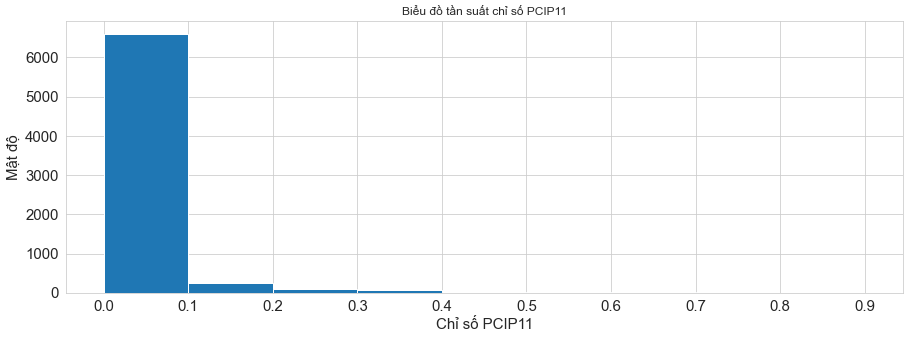

In [711]:
plt.figure(figsize=(15,5))

plt.hist(uni_inf_df_rev00.PCIP11,bins=np.arange(0,1,0.1))
plt.xticks(np.arange(0,1,0.1),fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Chỉ số PCIP11',fontsize=15)
plt.ylabel('Mật độ',fontsize=15)
plt.title('Biểu đồ tần suất chỉ số PCIP11')
plt.show();

Ta thấy rằng sự phân bố PCIP rất rõ ràng, chia ra 2 nhóm:
+ Nhóm 1 (0->0.1): Nhóm này chiếm với mật độ rất lớn, dường như nhóm này không chuyên về lĩnh vực CNTT (nghĩa là mạnh về các ngành còn lại)
+ Nhóm 2 (>0.1): Nhóm này chiếm rất nhỏ, cho thấy nhóm này rất đặt trưng so với nhóm 1 <p>
=> Ta lựa chọn các trường cho Robert dựa vào PCIP11 > 0.1

Xếp hạng theo nhóm khu vực

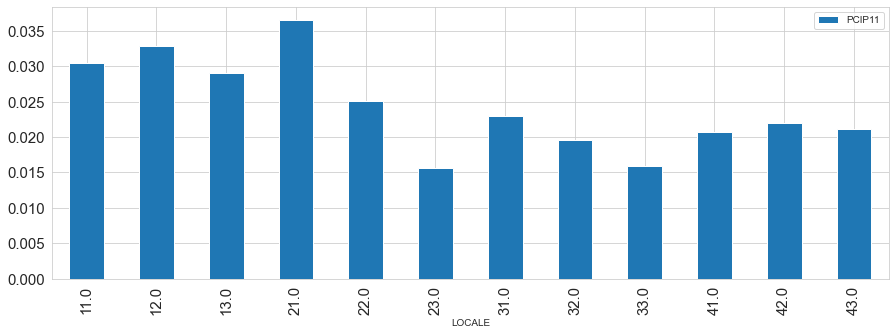

In [712]:
PCIP11_score_state = pd.pivot_table(data=uni_inf_df_rev00,index=['LOCALE'],values='PCIP11',fill_value=0)
PCIP11_score_state.plot(kind='bar',figsize=(15,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

Lọc ra các thành phố có chương trình học

In [713]:
PCIP11_university = uni_inf_df_rev00.loc[uni_inf_df_rev00['PCIP11'] > 0]
PCIP11_university.sample(5)

,INSTNM,CITY,STABBR,LOCALE,PCIP11
4836,Colorado Technical University-Sioux Falls,Sioux Falls,SD,12.0,0.1126
819,Nova Southeastern University,Fort Lauderdale,FL,21.0,0.0130
2543,Monroe Community College,Rochester,NY,21.0,0.0164
1762,Bard College at Simon's Rock,Great Barrington,MA,41.0,0.0083
401,Loyola Marymount University,Los Angeles,CA,11.0,0.0039


In [714]:
# Kiểm tra giá trị null xem có giảm đi nhiều không
PCIP11_university.isnull().sum()

INSTNM    0
CITY      0
STABBR    0
LOCALE    2
PCIP11    0
dtype: int64

==> Dữ liệu rất ok, để fillna 2 giá trị ở cột LOCALE thì ta xem xét 2 cột đó có những đặc điểm gì để fillna khu vực sao cho hợp lý

In [715]:
# KIểm tra 2 thằng này, ta sẽ fill cột LOCALE theo thành phố
PCIP11_university[PCIP11_university['LOCALE'].isnull()]

,INSTNM,CITY,STABBR,LOCALE,PCIP11
4310,College of Micronesia-FSM,Pohnpei,FM,NaN,0.0679
4311,Palau Community College,Koror,PW,NaN,0.0202


In [716]:
PCIP11_university.loc[PCIP11_university['CITY'] == 'Pohnpei']
PCIP11_university.loc[PCIP11_university['CITY'] == 'Koror']

,INSTNM,CITY,STABBR,LOCALE,PCIP11
4311,Palau Community College,Koror,PW,NaN,0.0202


==> Theo thành phố không khả thi vì trong tập dữ liệu chỉ có thành phố, theo bang.

In [717]:
PCIP11_university.loc[PCIP11_university['STABBR'] == 'FM']
PCIP11_university.loc[PCIP11_university['CITY'] == 'PW']

,INSTNM,CITY,STABBR,LOCALE,PCIP11


==> Cũng không có thông tin

In [718]:
len(PCIP11_university[PCIP11_university['LOCALE'].isnull()])/len(PCIP11_university)*100

0.06770480704129993

==> Dữ liệu null chỉ chiếm 0.06% nên ta thực hiện dropna() xóa bỏ 2 hàng này

In [719]:
PCIP11_university.dropna(inplace=True)

C:\Users\VINH\AppData\Local\Temp\ipykernel_1896\3217137913.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCIP11_university.dropna(inplace=True)


In [720]:
PCIP11_university.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 7382
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INSTNM  2952 non-null   object 
 1   CITY    2952 non-null   object 
 2   STABBR  2952 non-null   object 
 3   LOCALE  2952 non-null   float64
 4   PCIP11  2952 non-null   float64
dtypes: float64(2), object(3)
memory usage: 138.4+ KB


==> Dữ liệu của bảng các trường đại học đã sạch

# Mearge các dữ liệu lại thành 1 bảng hoàn chỉnh

Lấy dữ liệu trường đại học làm mốc để merge 2 bảng Startup metro và bảng crime

In [721]:
PCIP11_university.head()

,INSTNM,CITY,STABBR,LOCALE,PCIP11
0,Alabama A & M University,Normal,AL,12.0,0.0348
1,University of Alabama at Birmingham,Birmingham,AL,12.0,0.0099
2,Amridge University,Montgomery,AL,12.0,0.0411
3,University of Alabama in Huntsville,Huntsville,AL,12.0,0.0273
4,Alabama State University,Montgomery,AL,12.0,0.0450


In [722]:
crime_sum_df.head()

,City,Total
0,Abilene,8043.0
1,Aguadilla,1637.9
2,Akron,5581.5
3,Albany,15769.5
4,Albuquerque,10800.9


Vì thành phố chi tiết hơn Bang nen ta sẽ merge theo cột CITY

In [723]:
# Đổi tên cột của bảng Crime thành CITY cho đồng bộ tên 2 cột để merge
crime_sum_df.rename(columns={'City':'CITY'},inplace=True)

In [724]:
crime_sum_df.columns

Index(['CITY', 'Total'], dtype='object')

In [725]:
def translate_space(x):
   return x.translate({ord(' ') : None})

In [726]:
crime_sum_df.CITY = crime_sum_df.CITY.apply(translate_space)

In [727]:
crime_sum_df.tail(10)

,CITY,Total
325,WichitaFalls,7188.7
326,Williamsport,3999.8
327,Wilmington,13768.1
328,Winchester,4388.9
329,Worcester,4362.1
330,Yakima,7661.6
331,York,3537.8
332,YubaCity,5920.4
333,Yuma,5154.1
334,Total,2194300.4


In [728]:
PCIP11_university.CITY = PCIP11_university.CITY.apply(translate_space)

C:\Users\VINH\AppData\Local\Temp\ipykernel_1896\225501230.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PCIP11_university.CITY = PCIP11_university.CITY.apply(translate_space)


==> OK tiến hành merge

In [729]:
PCIP11_university_rev00 = PCIP11_university.merge(crime_sum_df,on=['CITY'],how='left')

In [730]:
PCIP11_university_rev00.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2952 entries, 0 to 2951
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   INSTNM  2952 non-null   object 
 1   CITY    2952 non-null   object 
 2   STABBR  2952 non-null   object 
 3   LOCALE  2952 non-null   float64
 4   PCIP11  2952 non-null   float64
 5   Total   1177 non-null   float64
dtypes: float64(3), object(3)
memory usage: 161.4+ KB


In [731]:
PCIP11_university_rev00.isnull().sum()

INSTNM       0
CITY         0
STABBR       0
LOCALE       0
PCIP11       0
Total     1775
dtype: int64

In [732]:
PCIP11_university_rev00.CITY.nunique()

1545

In [733]:
crime_sum_df.CITY.nunique()

335

==> Vì tập dữ liệu Crime có quá ít thông về về những thành phố khác nên dữ liệu khi merge về bảng University => giá trị null khá nhiều. <p>

In [734]:
PCIP11_university_rev00.groupby('STABBR')['Total'].mean()

STABBR
AK     9713.533333
AL     8219.130000
AR     8514.155556
AZ     7304.378261
CA     7674.983333
CO     6710.400000
CT     4464.787500
DC     9274.300000
DE    10716.460000
FL     8755.760526
GA     8998.568421
GU             NaN
HI     6709.200000
IA     5398.017391
ID     5088.525000
IL    10059.190698
IN     7082.166667
KS     6462.000000
KY     6717.568966
LA     9644.032143
MA    13620.007692
MD     7131.536842
ME     4969.540000
MI     8077.625806
MN     6486.476190
MO    15153.256000
MP             NaN
MS    13793.888889
MT     7628.140000
NC     8160.305263
ND     4447.183333
NE     6110.657143
NH     4410.200000
NJ     5663.475000
NM     9202.930769
NV     6448.862500
NY     7552.943243
OH    10169.978571
OK     7810.789474
OR     5656.931579
PA     6856.653226
PR     2622.509524
RI     4717.457143
SC    10428.328000
SD     5572.640000
TN     8090.765217
TX     7576.018824
UT     2813.980000
VA     6335.057143
VI             NaN
VT     9910.300000
WA    10768.453125
WI   

In [735]:
PCIP11_university_rev00[PCIP11_university_rev00['STABBR'] == 'AK']

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total
42,University of Alaska Anchorage,Anchorage,AK,11.0,0.0281,10139.2
43,University of Alaska Fairbanks,Fairbanks,AK,23.0,0.0037,8862.2
44,University of Alaska Southeast,Juneau,AK,33.0,0.0109,NaN
45,AVTEC-Alaska's Institute of Technology,Seward,AK,43.0,0.0918,NaN
46,Charter College-Anchorage,Anchorage,AK,11.0,0.0828,10139.2


In [736]:
PCIP11_university_rev00[PCIP11_university_rev00['STABBR'] == 'AL']

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total
0,Alabama A & M University,Normal,AL,12.0,0.0348,NaN
1,University of Alabama at Birmingham,Birmingham,AL,12.0,0.0099,8053.9
2,Amridge University,Montgomery,AL,12.0,0.0411,10806.1
3,University of Alabama in Huntsville,Huntsville,AL,12.0,0.0273,6879.1
4,Alabama State University,Montgomery,AL,12.0,0.0450,10806.1
5,The University of Alabama,Tuscaloosa,AL,13.0,0.0068,6649.4
6,Central Alabama Community College,AlexanderCity,AL,32.0,0.0186,NaN
7,Athens State University,Athens,AL,31.0,0.0386,6862.4
8,Auburn University,AuburnUniversity,AL,13.0,0.0051,NaN
9,Birmingham Southern College,Birmingham,AL,12.0,0.0033,8053.9


=> Quan sát những ô lệnh trên, ta có thể fill vào các trị null trong ô total vì các dữ liệu total gần với nhau trong 1 bang

In [737]:
# Kết hợp lệnh groupby fillna và transform
PCIP11_university_rev00['Total'] = PCIP11_university_rev00['Total'].fillna(PCIP11_university_rev00.groupby('STABBR')['Total'].transform('mean'))

In [738]:
PCIP11_university_rev00.isnull().sum()

INSTNM    0
CITY      0
STABBR    0
LOCALE    0
PCIP11    0
Total     4
dtype: int64

==> Các dữ liệu null còn lại thuộc các thành phố có bang không nằm trong tập dữ liệu crime nên ta sẽ loại bỏ nó

In [739]:
PCIP11_university_rev00.dropna(inplace=True)

Tiếp theo merge cột bang với các start up rank trong top 10

In [740]:
crime_df.State.nunique()

58

In [741]:
PCIP11_university_rev00.CITY.sample(10)

1125       Billings
556         Chicago
729          Salina
1329        NewYork
794      BatonRouge
1070         Summit
379         KeyWest
1930      SanAngelo
1062     University
1377    OldWestbury
Name: CITY, dtype: object

In [759]:
startup_df.head()

,Metro Area Main City,Startup Rank
0,Atlanta,13
1,Austin,1
2,Baltimore,17
3,Boston,22
4,Charlotte,25


In [761]:
PCIP11_university_rev01.loc[PCIP11_university_rev01['CITY'] == 'LosAngeles']

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
128,California State University-Los Angeles,LosAngeles,CA,11.0,0.0297,11186.9,4.0
134,University of California-Los Angeles,LosAngeles,CA,11.0,0.0156,11186.9,4.0
195,Los Angeles Southwest College,LosAngeles,CA,21.0,0.0096,11186.9,4.0
196,Los Angeles Trade Technical College,LosAngeles,CA,11.0,0.0082,11186.9,4.0
199,Los Angeles City College,LosAngeles,CA,11.0,0.0062,11186.9,4.0
203,Loyola Marymount University,LosAngeles,CA,11.0,0.0039,11186.9,4.0
252,Westwood College-Los Angeles,LosAngeles,CA,11.0,0.2690,11186.9,4.0
268,University of Southern California,LosAngeles,CA,11.0,0.0162,11186.9,4.0
2384,Los Angeles ORT College-Los Angeles Campus,LosAngeles,CA,11.0,0.0130,11186.9,4.0
2916,Advanced Computing Institute,LosAngeles,CA,11.0,0.3611,11186.9,4.0


In [745]:
PCIP11_university_rev01.loc[PCIP11_university_rev01['CITY'] == 'NewYork']

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
1256,Globe Institute of Technology,NewYork,NY,11.0,0.2258,7552.943243,7.0
1258,Barnard College,NewYork,NY,11.0,0.0016,7552.943243,7.0
1272,Columbia University in the City of New York,NewYork,NY,11.0,0.0339,7552.943243,7.0
1276,CUNY Bernard M Baruch College,NewYork,NY,11.0,0.0408,7552.943243,7.0
1277,CUNY Borough of Manhattan Community College,NewYork,NY,11.0,0.0642,7552.943243,7.0
1281,CUNY City College,NewYork,NY,11.0,0.0133,7552.943243,7.0
1282,CUNY Hunter College,NewYork,NY,11.0,0.0107,7552.943243,7.0
1283,CUNY John Jay College of Criminal Justice,NewYork,NY,11.0,0.0118,7552.943243,7.0
1329,New York University,NewYork,NY,11.0,0.0053,7552.943243,7.0
1336,Pace University-New York,NewYork,NY,11.0,0.0570,7552.943243,7.0


In [766]:
startup_df.head()

,CITY,Startup Rank
0,Atlanta,13
1,Austin,1
2,Baltimore,17
3,Boston,22
4,Charlotte,25


In [763]:
# Đổi tên cột trong bảng startup startup_rank_df
startup_df.rename(columns={'Metro Area Main City':'CITY'},inplace=True)

C:\Users\VINH\AppData\Local\Temp\ipykernel_1896\3454133528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  startup_df.rename(columns={'Metro Area Main City':'CITY'},inplace=True)


In [767]:
PCIP11_university_rev01 = PCIP11_university_rev00.merge(startup_df,on='CITY',how='left')

In [788]:
PCIP11_university_rev01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2948 entries, 0 to 2947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INSTNM        2948 non-null   object 
 1   CITY          2948 non-null   object 
 2   STABBR        2948 non-null   object 
 3   LOCALE        2948 non-null   float64
 4   PCIP11        2948 non-null   float64
 5   Total         2948 non-null   float64
 6   Startup Rank  419 non-null    float64
dtypes: float64(4), object(3)
memory usage: 184.2+ KB


In [779]:
PCIP11_university_rev01[PCIP11_university_rev01['Startup Rank'].isnull()].sample(10)

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
1441,Martin Community College,Williamston,NC,41.0,0.0231,8160.305263,NaN
1999,Ranger College,Ranger,TX,42.0,0.0088,7576.018824,NaN
1032,Rochester Community and Technical College,Rochester,MN,12.0,0.0088,8060.600000,NaN
943,Ferris State University,BigRapids,MI,33.0,0.0134,8077.625806,NaN
1514,Belmont College,SaintClairsville,OH,41.0,0.0955,10169.978571,NaN
813,Tulane University of Louisiana,NewOrleans,LA,11.0,0.0383,7129.300000,NaN
2283,Inter American University of Puerto Rico-Aguad...,Aguadilla,PR,21.0,0.0733,1637.900000,NaN
2610,Remington College-Baton Rouge Campus,BatonRouge,LA,12.0,0.0343,7956.700000,NaN
681,Iowa Central Community College,FortDodge,IA,33.0,0.0058,5398.017391,NaN
66,University of Phoenix-Phoenix Campus,Tempe,AZ,12.0,0.0630,7304.378261,NaN


In [780]:
startup_df.CITY.unique()

array(['Atlanta', 'Austin', 'Baltimore', 'Boston', 'Charlotte', 'Chicago',
       'Cincinnati', 'Cleveland', 'Columbus', 'Dallas', 'Denver',
       'Detroit', 'Houston', 'Indianapolis', 'Jacksonville', 'KansasCity',
       'LasVegas', 'LosAngeles', 'Miami', 'Milwaukee', 'Minneapolis',
       'Nashville', 'NewYork', 'Orlando', 'Philadelphia', 'Phoenix',
       'Pittsburgh', 'Portland', 'Providence', 'Riverside', 'Sacramento',
       'SanAntonio', 'SanDiego', 'SanFrancisco', 'SanJose', 'Seattle',
       'StLouis', 'Tampa', 'VirginiaBeach', 'Washington'], dtype=object)

In [789]:
startup_df.CITY.nunique()

40

In [790]:
PCIP11_university_rev01.CITY.nunique()

1542

==> Vì lượng thành phố chênh lệch nên ta dữ liệu sau khi drop sẽ rất nhỏ, ta không thể fillna cho các thành phố trogn xếp hảng vì bảng xếp hạng này chỉ xếp hạng các thành phố triển vọng và phát triển nên nó rất đặc thù

In [792]:
PCIP11_university_rev01.dropna(inplace=True)

In [793]:
PCIP11_university_rev01.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 419 entries, 21 to 2937
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INSTNM        419 non-null    object 
 1   CITY          419 non-null    object 
 2   STABBR        419 non-null    object 
 3   LOCALE        419 non-null    float64
 4   PCIP11        419 non-null    float64
 5   Total         419 non-null    float64
 6   Startup Rank  419 non-null    float64
dtypes: float64(4), object(3)
memory usage: 26.2+ KB


In [794]:
PCIP11_university_rev01.isnull().sum()

INSTNM          0
CITY            0
STABBR          0
LOCALE          0
PCIP11          0
Total           0
Startup Rank    0
dtype: int64

In [795]:
final_uni_df = PCIP11_university_rev01.copy()

In [796]:
final_uni_df.head()

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
21,Jacksonville State University,Jacksonville,AL,13.0,0.0132,12317.7,27.0
47,Collins College,Phoenix,AZ,11.0,0.0683,6425.2,14.0
57,Anthem College-Phoenix,Phoenix,AZ,11.0,0.0058,6425.2,14.0
58,GateWay Community College,Phoenix,AZ,11.0,0.0069,6425.2,14.0
65,Phoenix College,Phoenix,AZ,11.0,0.0075,6425.2,14.0


Các tiêu chí chọn trường cho Robert:
+ Khu vực thành thị: Có mã LOCALE 11,12,13
+ Startup rank: Nằm trong top 25% cao nhất
+ Số tội phạm, thấp hơn 50% tổng số tội phạm (giá trị lớn nhất)
+ Có chương trình học “Computer And Information Sciences And Support Services”: Đã lọc ở trên, có chỉ số PCIP11 > 0

Tạo các biến chứ các giá trị trên

In [823]:
# Khu vực thành thị
locale = [11.0,12.0,13.0]

# Trong top 25% cao nhất
max_rank = 0.25 * np.max(startup_df['Startup Rank'])

# Số tối phạm thấp hơn 50% tổng 
max_crime = np.sum(final_uni_df['Total']) * 0.5


Tiến hành lọc dữ liệu

In [826]:
list_uni_4Robert = final_uni_df.loc[final_uni_df['LOCALE'].isin(locale) & (final_uni_df['Startup Rank'] <= max_rank) & (final_uni_df['Total'] < max_crime)]
list_uni_4Robert

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
101,Academy of Art University,SanFrancisco,CA,11.0,0.0675,17731.600000,6.0
107,Associated Technical College-San Diego,SanDiego,CA,11.0,0.1809,4507.700000,9.0
128,California State University-Los Angeles,LosAngeles,CA,11.0,0.0297,11186.900000,4.0
134,University of California-Los Angeles,LosAngeles,CA,11.0,0.0156,11186.900000,4.0
139,California College San Diego,SanDiego,CA,11.0,0.0907,4507.700000,9.0
...,...,...,...,...,...,...,...
2845,The Art Institute of San Antonio,SanAntonio,TX,11.0,0.0732,8779.100000,10.0
2871,Brown Mackie College-San Antonio,SanAntonio,TX,11.0,0.0333,8779.100000,10.0
2913,CyberTex Institute of Technology,Austin,TX,11.0,0.7000,5920.900000,1.0
2916,Advanced Computing Institute,LosAngeles,CA,11.0,0.3611,11186.900000,4.0


In [840]:
list_uni_4Robert.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97 entries, 101 to 2920
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   INSTNM        97 non-null     object 
 1   CITY          97 non-null     object 
 2   STABBR        97 non-null     object 
 3   LOCALE        97 non-null     float64
 4   PCIP11        97 non-null     float64
 5   Total         97 non-null     float64
 6   Startup Rank  97 non-null     float64
dtypes: float64(4), object(3)
memory usage: 6.1+ KB


=> Tập dữ liệu các trường đại học cho Robert gồm có 97 trường <p>
Bảng xếp hạng sẽ sắp xếp các tiêu chí đánh giá theo thứ tự sau: <p>
+ Thành phố lớn (từ lớn đến bé)
+ Xếp hạng startup: từ bé đến lớn
+ Số tội phạm: từ bé đến lớn
+ Chỉ số PCIP11: Lớn đến bé

In [843]:
list_uni_4Robert.sort_values(by=['LOCALE','Startup Rank','Total','PCIP11'],ascending=[True,True,True,False]).set_index(np.arange(1,len(list_uni_4Robert)+1)).head(30)

,INSTNM,CITY,STABBR,LOCALE,PCIP11,Total,Startup Rank
1,CyberTex Institute of Technology,Austin,TX,11.0,0.7000,5920.9,1.0
2,ITT Technical Institute-Austin,Austin,TX,11.0,0.3929,5920.9,1.0
3,Strayer University-Texas,Austin,TX,11.0,0.1356,5920.9,1.0
4,National American University-Austin,Austin,TX,11.0,0.0588,5920.9,1.0
5,Austin Community College District,Austin,TX,11.0,0.0353,5920.9,1.0
6,Huston-Tillotson University,Austin,TX,11.0,0.0331,5920.9,1.0
7,The University of Texas at Austin,Austin,TX,11.0,0.0248,5920.9,1.0
8,Saint Edward's University,Austin,TX,11.0,0.0083,5920.9,1.0
9,Concordia University-Texas,Austin,TX,11.0,0.0032,5920.9,1.0
10,South Florida Institute of Technology,Miami,FL,11.0,0.1519,16153.5,2.0
